In [1]:
from google.colab import drive
drive.mount('/content/drive')

workdir = "/content/drive/MyDrive/Colab Notebooks/TG/src"

# DEFININDO O DIRETÓRIO ATUAL COMO DIRETÓRIO DE REFERÊNCIA

import os
os.chdir(workdir)
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/TG/src'

In [2]:
!pip install pandas seaborn plotly folium sidetable prophet statsmodels

# IMPORTANDO AS BIBLIOTECAS

In [3]:
import datetime
import os
from pathlib import Path
from inspect import stack

import numpy as np
import pandas as pd
import sidetable
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import rcParams
from cycler import cycler
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

# DEFININDO OPÇÕES GLOBAIS

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
rcParams['figure.figsize'] = 18, 5
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['axes.prop_cycle'] = cycler(color=['#365977'])
rcParams['lines.linewidth'] = 2.5

# FUNÇÕES ÚTEIS

In [8]:
def get_files_directory(path_dir, specific_type=None):

    """

        FUNÇÃO PARA OBTER ARQUIVOS DE UM DIRETÓRIO.

        É POSSÍVEL ENVIAR UM FORMATO ESPECÍFICO PARA
        FILTRO DO FORMATO DE ARQUIVO DESEJADO.
        EX: OBTER APENAS XLSX

        # Arguments
            path_dir                   - Required : Diretório analisado (String)
            specific_type              - Optional : Lista com os formatos desejados (List)

        # Returns
            list_files                 - Required : Arquivos do diretório (List)

    """

    # INICIANDO A VARIÁVEL QUE ARMAZENARÁ TODOS OS ARQUIVOS DO DIRETÓRIO
    list_files = []

    # OBTENDO TODOS OS ARQUIVOS
    try:

        # VERIFICANDO SE É DIRETÓRIO
        if os.path.isdir(path_dir):

            # OBTENDO TODOS OS ARQUIVOS EXISTENTES NO ARQUIVO
            list_files = [os.path.join(path_dir, name) for name in os.listdir(path_dir)]

            # VERIFICANDO SE UMA EXTENSÃO ESPECÍFICA FOI DEFINIDA
            if specific_type:

              # VERIFICANDO SE A EXTENSÃO É DO TIPO TUPLE/LIST
              if not isinstance(specific_type, (tuple, list)):
                  specific_type = [specific_type]

              print("FILTRANDO PARA AS EXTENSÕES: {}".format(specific_type))

              # FILTRANDO OS VALORES DA LISTA
              list_files = [arq for arq in list_files if (Path(arq).suffix in (specific_type) or str(Path(arq).suffix).replace(".", "") in (specific_type))]

        else:
            list_files = [path_dir]

    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return list_files

In [9]:
def read_file(dir_name_file, csv_separator=","):

    """

      FUNÇÃO PARA LER UM ARQUIVO CSV OU EXCEL (XLS OU XLSX)
      COM OUTPUT EM FORMATO DATAFRAME

      # Arguments
          dir_name_file          - Required : Arquivo a ser lido
                                              (com o seu caminho fornecido) (Path | String)
          csv_separator          - Optional : Separador usado para caso de csv file (String)
      # Returns
          data                   - Required : Dados obtidos (DataFrame)


    """

    # INICIANDO A VARIÁVEL DE RETORNO
    data = pd.DataFrame()

    try:
      # VERIFICA SE É O ARQUIVO É CSV
      if dir_name_file.endswith('.csv'):
          data = pd.read_csv(dir_name_file, sep=csv_separator)

      # VERIFICA SE É O ARQUIVO É EXCEL
      elif dir_name_file.endswith(('.xls', '.xlsx')):
          data = pd.read_excel(dir_name_file)

      # PARA CASO NÃO CSV E NEM EXCEL, RETORNA NONE
      else:
          print("Formato de arquivo não suportado.")
          return None
    except Exception as ex:
        print("ERRO NA FUNÇÃO: {} - {}".format(stack()[0][3], ex))

    return data

# VARIÁVEIS GLOBAIS

In [10]:
# DIRETÓRIO ONDE ESTÃO OS DADOS
data_dir = 'data/4_RESULTS_DATASET_GHCN_DAILY/DATASET_GHCN_PROCESING_FREQ_DAILY.csv'

# FORMATO DESEJADO
specific_type = "csv"

In [11]:
# NOME DA COLUNA QUE CONTÉM AS INFORMAÇÕES DAS ESTAÇÕES CLIMÁTICAS
name_column_location = "name"

# OBTENDO OS DADOS DO GHCN-DAILY - RESULTADOS DO PRÉ PROCESSAMENTO

> Global Historical Climatology Network - Daily, Version 4
(NOAA GHCN v4)

Esses dados são obtidos pela pipeline construida em:

https://github.com/emersonrafaels/tg_series_temporais_otimizacao_gerenciamento_energia/blob/main/src/1_PROCESSING_GHCN_Daily.ipynb

In [12]:
df = read_file(dir_name_file=data_dir)

<ipython-input-9-98bfea200ae6>:24: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(dir_name_file, sep=csv_separator)


In [13]:
df

,measurement date,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,temp,state,city
0,1942-10-01,821930.0,1942.0,10.0,1.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,NaN,2.983775,26.055556,Pará,NaN
1,1942-10-02,821930.0,1942.0,10.0,2.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.189553,26.333333,Pará,NaN
2,1942-10-03,821930.0,1942.0,10.0,3.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,4.732885,26.444444,Pará,NaN
3,1942-10-04,821930.0,1942.0,10.0,4.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.601108,26.222222,Pará,NaN
4,1942-10-05,821930.0,1942.0,10.0,5.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,2.726553,25.777778,Pará,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4852187,2023-07-21,831030.0,2023.0,7.0,21.0,CAMPOS DOS GOITACAZES,BR,-21.700,-41.300,20201204.0,20210917.0,0.0,2.880886,21.888889,Rio de Janeiro,NaN
4852188,2023-07-22,831030.0,2023.0,7.0,22.0,CAMPOS DOS GOITACAZES,BR,-21.700,-41.300,20201204.0,20210917.0,0.0,2.469331,21.666667,Rio de Janeiro,NaN
4852189,2023-07-23,831030.0,2023.0,7.0,23.0,CAMPOS DOS GOITACAZES,BR,-21.700,-41.300,20201204.0,20210917.0,0.0,5.555995,22.055556,Rio de Janeiro,NaN
4852190,2023-07-24,831030.0,2023.0,7.0,24.0,CAMPOS DOS GOITACAZES,BR,-21.700,-41.300,20201204.0,20210917.0,0.0,3.498219,23.944444,Rio de Janeiro,NaN


In [14]:
df.head()

,measurement date,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,temp,state,city
0,1942-10-01,821930.0,1942.0,10.0,1.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,NaN,2.983775,26.055556,Pará,NaN
1,1942-10-02,821930.0,1942.0,10.0,2.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.189553,26.333333,Pará,NaN
2,1942-10-03,821930.0,1942.0,10.0,3.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,4.732885,26.444444,Pará,NaN
3,1942-10-04,821930.0,1942.0,10.0,4.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.601108,26.222222,Pará,NaN
4,1942-10-05,821930.0,1942.0,10.0,5.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,2.726553,25.777778,Pará,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4852192 entries, 0 to 4852191
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   measurement date  object 
 1   stn               float64
 2   year              float64
 3   month             float64
 4   day               float64
 5   name              object 
 6   country           object 
 7   lat               float64
 8   lon               float64
 9   begin             float64
 10  end               float64
 11  prcp              float64
 12  wdsp              float64
 13  temp              float64
 14  state             object 
 15  city              object 
dtypes: float64(11), object(5)
memory usage: 592.3+ MB


In [16]:
df.describe()

,stn,year,month,day,lat,lon,begin,end,prcp,wdsp,temp
count,4.852192e+06,4.852192e+06,4.852192e+06,4.852192e+06,4.852192e+06,4.852192e+06,4.852192e+06,4.852192e+06,4.851914e+06,4.840792e+06,4.852192e+06
mean,8.366920e+05,1.999327e+03,6.681271e+00,1.554205e+01,-1.497438e+01,-4.808093e+01,1.975071e+07,2.019180e+07,7.506172e+00,2.427274e+01,2.453118e+01
std,1.507786e+04,1.719716e+01,3.379855e+00,9.113135e+00,8.926766e+00,8.013741e+00,2.949870e+05,5.891643e+04,3.104067e+01,1.031888e+02,4.276475e+00
min,7.490240e+05,1.942000e+03,1.000000e+00,1.000000e+00,-3.375000e+01,-7.278700e+01,1.931010e+07,1.945092e+07,0.000000e+00,5.144440e-02,-7.833333e+00
25%,8.259500e+05,1.988000e+03,4.000000e+00,8.000000e+00,-2.234500e+01,-5.235000e+01,1.943080e+07,2.021051e+07,0.000000e+00,1.286110e+00,2.216667e+01
50%,8.342800e+05,1.997000e+03,7.000000e+00,1.500000e+01,-1.565300e+01,-4.777400e+01,1.973010e+07,2.021092e+07,0.000000e+00,2.263554e+00,2.527778e+01
75%,8.384000e+05,2.017000e+03,9.000000e+00,2.400000e+01,-7.100000e+00,-4.210000e+01,2.005010e+07,2.021092e+07,0.000000e+00,3.601108e+00,2.750000e+01
max,8.699800e+05,2.023000e+03,1.200000e+01,3.100000e+01,3.867000e+00,-2.931700e+01,2.020120e+07,2.021092e+07,1.969000e+03,5.143926e+02,4.138889e+01


## ANALISANDO QUANTIDADE DE NULOS

In [17]:
df.isnull().sum()

measurement date          0
stn                       0
year                      0
month                     0
day                       0
name                      0
country                   0
lat                       0
lon                       0
begin                     0
end                       0
prcp                    278
wdsp                  11400
temp                      0
state                 17351
city                2685640
dtype: int64

## ANALISANDO A QUANTIDADE DE INSTÂNCIAS DAS ESTAÇÕES METEREOLÓGICAS

In [18]:
df["name"].value_counts()

VAL DE CANS INTL                 29660
PINTO MARTINS INTL               29462
MARECHAL CUNHA MACHADO INTL      29448
PARNAIBA PREFEITO DR JOAO SIL    29437
AUGUSTO SEVERO                   29356
                                 ...  
OBIDOS                               1
MATUPA *                             1
PADRE RICARDO REMETTER               1
TRIUNFO                              1
CANARANA                             1
Name: name, Length: 652, dtype: int64

# ANALISANDO A SÉRIE TEMPORAL

In [19]:
df[df["name"].isin(df["name"].unique()[:10])].to_csv("/content/drive/MyDrive/Colab Notebooks/TG/DATASET_GHCN_PROCESING_FREQ_DAILY_UNIQUE_STATION.csv", index=None)

## ANALISANDO UMA ESTAÇÃO

Selecionamos a estação com a maior quantidade de dados, porém o processo pode ser repetido para qualquer outra estação metereológica.

In [20]:
df_unique_station = df[df["name"] == "VAL DE CANS INTL"]

## ANALISANDO A QUANTIDADE DE NULOS DO CONJUNTO DE DADOS DA ESTAÇÃO

In [21]:
df_unique_station.isnull().sum()

measurement date        0
stn                     0
year                    0
month                   0
day                     0
name                    0
country                 0
lat                     0
lon                     0
begin                   0
end                     0
prcp                    1
wdsp                    0
temp                    0
state                   0
city                29660
dtype: int64

# ANALISANDO ESTATISTICAMENTE

In [22]:
df_unique_station.describe()

,stn,year,month,day,lat,lon,begin,end,prcp,wdsp,temp
count,29660.0,29660.000000,29660.000000,29660.000000,29660.000,29660.000,29660.0,29660.0,29659.000000,29660.000000,29660.000000
mean,821930.0,1982.689076,6.835131,16.918071,-1.379,-48.476,19421001.0,20210920.0,11.920395,46.545873,26.538027
std,0.0,23.646021,3.500121,9.386173,0.000,0.000,0.0,0.0,38.672872,143.092466,0.902155
min,821930.0,1942.000000,1.000000,1.000000,-1.379,-48.476,19421001.0,20210920.0,0.000000,0.102889,17.777778
25%,821930.0,1963.000000,4.000000,9.000000,-1.379,-48.476,19421001.0,20210920.0,0.000000,2.006332,25.944444
50%,821930.0,1983.000000,7.000000,17.000000,-1.379,-48.476,19421001.0,20210920.0,0.000000,2.726553,26.611111
75%,821930.0,2003.000000,10.000000,25.000000,-1.379,-48.476,19421001.0,20210920.0,4.000000,3.601108,27.055556
max,821930.0,2023.000000,12.000000,31.000000,-1.379,-48.476,19421001.0,20210920.0,1945.000000,514.392556,32.222222


In [23]:
df_unique_station

,measurement date,stn,year,month,day,name,country,lat,lon,begin,end,prcp,wdsp,temp,state,city
0,1942-10-01,821930.0,1942.0,10.0,1.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,NaN,2.983775,26.055556,Pará,NaN
1,1942-10-02,821930.0,1942.0,10.0,2.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.189553,26.333333,Pará,NaN
2,1942-10-03,821930.0,1942.0,10.0,3.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,4.732885,26.444444,Pará,NaN
3,1942-10-04,821930.0,1942.0,10.0,4.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.601108,26.222222,Pará,NaN
4,1942-10-05,821930.0,1942.0,10.0,5.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,2.726553,25.777778,Pará,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29655,2023-12-10,821930.0,2023.0,12.0,10.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,0.0,3.601108,27.777778,Pará,NaN
29656,2023-12-11,821930.0,2023.0,12.0,11.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,4.0,2.983775,28.166667,Pará,NaN
29657,2023-12-12,821930.0,2023.0,12.0,12.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,2.0,4.269885,28.166667,Pará,NaN
29658,2023-12-13,821930.0,2023.0,12.0,13.0,VAL DE CANS INTL,BR,-1.379,-48.476,19421001.0,20210920.0,2.0,2.983775,27.444444,Pará,NaN


## PLOTANDO A SÉRIE TEMPORAL

In [24]:
# PLOTANDO A SÉRIE TEMPORAL
fig = px.line(df_unique_station, x="measurement date", y="temp")

# ATUALIZANDO TÍTULO E LEGENDA
fig.update_layout(
    title="Série temporal - Estação Metereológica: {}".format(df_unique_station["name"].unique()[0]),
    xaxis_title="Data (measurement date)",
    yaxis_title="Temperatura (temp)",
    legend_title="Legenda",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# INCLUINDO O TIMERANGER
fig.update_xaxes(rangeslider_visible=True)

# MOSTRANDO O GRÁFICO
fig.show()

In [25]:
# PLOTANDO A SÉRIE TEMPORAL
fig = px.line(df_unique_station, x="measurement date", y="prcp")

# ATUALIZANDO TÍTULO E LEGENDA
fig.update_layout(
    title="Série temporal - Estação Metereológica: {}".format(df_unique_station["name"].unique()[0]),
    xaxis_title="Data (measurement date)",
    yaxis_title="Precipitação (prcp)",
    legend_title="Legenda",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# INCLUINDO O TIMERANGER
fig.update_xaxes(rangeslider_visible=True)

# MOSTRANDO O GRÁFICO
fig.show()

In [26]:
# PLOTANDO A SÉRIE TEMPORAL
fig = px.line(df_unique_station, x="measurement date", y="wdsp")

# ATUALIZANDO TÍTULO E LEGENDA
fig.update_layout(
    title="Série temporal - Estação Metereológica: {}".format(df_unique_station["name"].unique()[0]),
    xaxis_title="Data (measurement date)",
    yaxis_title="Velocidade do vento (wdsp)",
    legend_title="Legenda",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)

# INCLUINDO O TIMERANGER
fig.update_xaxes(rangeslider_visible=True)

# MOSTRANDO O GRÁFICO
fig.show()

## WHITE NOISE

### COMPARANDO MÉDIA E DESVIO PADRÃO DURANTE O TEMPO

In [27]:
name_variable_analysis = "Temperatura"

In [28]:
def plot_mean_variance_over_time(dataset, analysis_variable, n_chunks=20, name_analysis_variable=""):

  """

    REALIZA O PLOT COMPARATIVO DA MÉDIA E VARIÂNCIA
    DE UM CONJUNTO DE DADOS AO
    LONGO DE UM PERÍODO DE TEMPO

    # Arguments
      dataset                 - Required: Conjunto de dados a ser analisado (DataFrame)
      analysis_variable       - Required: Variável de análise do dataframe, que será plotada
                                          A variável deve ser um valor numérico (String)
      n_chunks                - Optional: Quantidade de partes que os dados serão fragmentados.
                                          Cada parte representa um período de tempo
      name_analysis_variable  - Optional: Nome da variável de análise (String)

    # Returns
      means                   - Required: Lista com a média de cada parte (List)
      variances               - Required: Lista com a variância de cada parte (List)

  """

  # ANALISANDO SE O DATASET É UM DATAFRAME E SE A VARIÁVEL DE ANÁLISE CONSTA NESSE DATAFRAME
  if isinstance(dataset, pd.DataFrame):
    if analysis_variable in dataset.columns:

      # OBTENDO A MÉDIA GLOBAL
      mean_global = dataset[analysis_variable].mean()

      # OBTENDO A VARIÂNCIA GLOBAL
      variance_global = (dataset[analysis_variable].var())

      # DIVINDO OS DADOS EM UM ARBITRÁRIO NÚMERO DE PARTES (CHUNKS)
      df_unique_station_chunks = np.array_split(dataset[analysis_variable], n_chunks)

      # INICIANDO AS VARIÁVEIS AUXILIARES
      means, variances = [], []

      # OBTENDO A MÉDIA E A VARIÂNCIA DE CADA PARTE (CHUNK)
      for chunk in df_unique_station_chunks:
          means.append(np.mean(chunk))
          variances.append((np.var(chunk)))

      # Plot
      plt.title('Comparando média e variância ao longo do tempo \nEstação Metereológica: {} - \nVariável {}'.format(df_unique_station["name"].unique()[0],
                                                                                                                    name_analysis_variable),
                size=15)
      plt.plot(np.arange(len(means)), [mean_global] * len(means), label='Média global', lw=1.5)
      plt.scatter(x=np.arange(len(means)), y=means, label='Média', s=100)
      plt.plot(np.arange(len(variances)), [variance_global] * len(variances), label='Variância global', lw=1.5, color='orange')
      plt.scatter(x=np.arange(len(variances)), y=variances, label='Variância', color='orange', s=100)


      # DEFININDO O YAXIS E XAXIS RANGE
      plt.ylim(-1, max(variances + means)*1.2)
      plt.xlim(-1, len(means)*1.1)

      plt.legend()

      # DIRETÓRIO DE SAVE
      dir_save = os.path.join("data/5_MODEL_GHCN_DAILY/1_ANALYSIS_WHITE_NOISE",
                              'estacao_metereologica_{}_comparando_media_variance.png'.format(df_unique_station["name"].unique()[0]))

      # SALVANDO A FIGURA
      plt.savefig(dir_save)

      return mean_global, variance_global, means, variances

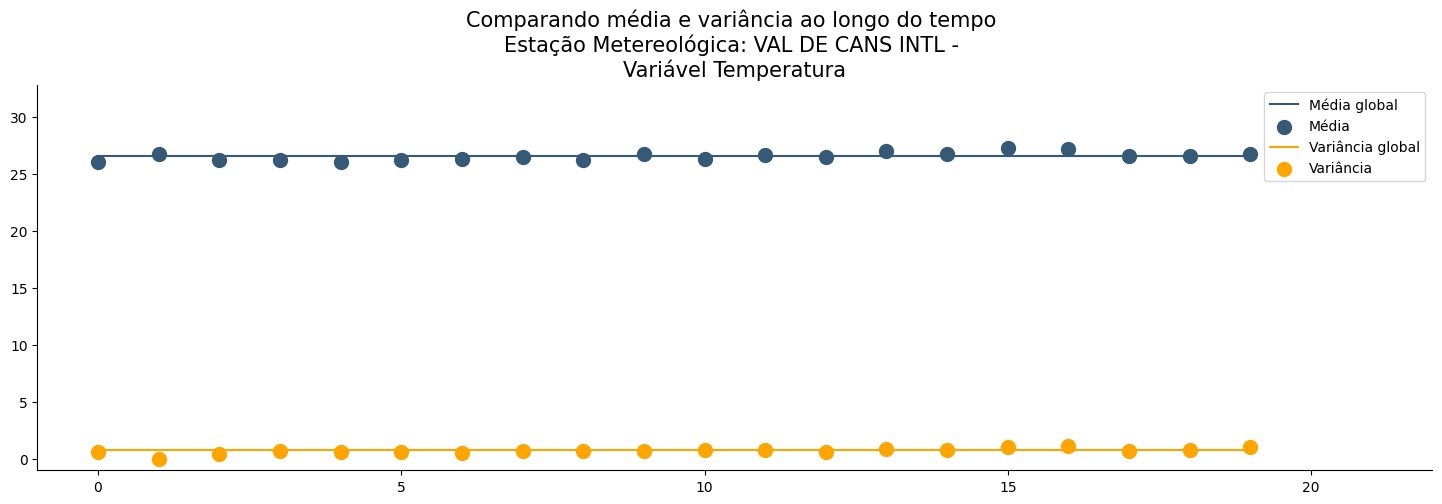

In [29]:
mean_global, variance_global, means, variances = plot_mean_variance_over_time(dataset=df_unique_station,
                                                                              analysis_variable="temp",
                                                                              name_analysis_variable=name_variable_analysis)

#### OBTENDO O MÁXIMO DE VARIAÇÃO EM RELAÇÃO À MEDIA GLOBAL

In [30]:
max_mean_difference = abs(1 - means/mean_global).max()
round(max_mean_difference, 2)

0.03

#### OBTENDO O MÁXIMO DE VARIAÇÃO EM RELAÇÃO À VARIÂNCIA GLOBAL

In [31]:
max_variance_difference = abs(1 - variances/variance_global).max()
round(max_variance_difference, 2)

1.0

## CALCULANDO A AUTOCORRELAÇÃO RESIDUAL NA SÉRIE

### TESTE DE LJUNG-BOX

In [32]:
def test_ljung_box(data, n_lags=10):

  """

    VERIFICA SE UMA SÉRIE DE DADOS POSSUI AUTOCORRELAÇÃO

    SE O VALOR P (P-VALUE) FOR MAIOR QUE O NÍVEL DE SIGNIFICÂNCIA ESCOLHIDO
    (POR EXEMPLO, 0.05 OU 0.01), NÃO HÁ EVIDÊNCIA SUFICIENTE PARA REJEITAR A HIPÓTESE NULA.
    INTERPRETAÇÃO: NÃO HÁ AUTOCORRELAÇÃO SIGNIFICATIVA NOS DADOS ATÉ AS DEFASAGENS TESTADAS.

    SE O VALOR P FOR MENOR QUE O NÍVEL DE SIGNIFICÂNCIA ESCOLHIDO, A HIPÓTESE NULA É REJEITADA.
    INTERPRETAÇÃO: HÁ EVIDÊNCIAS DE AUTOCORRELAÇÃO NOS DADOS ATÉ AS DEFASAGENS TESTADAS.

    # Arguments
      data                           - Required: Dados a serem analisados (DataFrame)
      n_lags                         - Optional: Número de lags para analisar (Integer)

    # Returns
      result_test_ljung_box          - Required: Resultado do teste Ljung-Box (DataFrame)
      data_is_white_noise            - Required: Resultado da verificação se a curva é white noise (Boolean)

  """

  # Teste de Ljung-Box para verificar autocorrelação
  result_test_ljung_box = acorr_ljungbox(data,
                                         lags=n_lags)

  if not result_test_ljung_box[result_test_ljung_box["lb_pvalue"] > 0.05].empty:
    data_is_white_noise = True
  else:
    data_is_white_noise = False

  return result_test_ljung_box, data_is_white_noise

In [33]:
result_test_ljung_box, data_is_white_noise = test_ljung_box(data=df_unique_station["temp"], n_lags=10)

In [34]:
print("A CURVA É WHITE NOISE: {}".format(data_is_white_noise))

A CURVA É WHITE NOISE: False


## PLOTANDO A AUTOCORRELAÇÃO

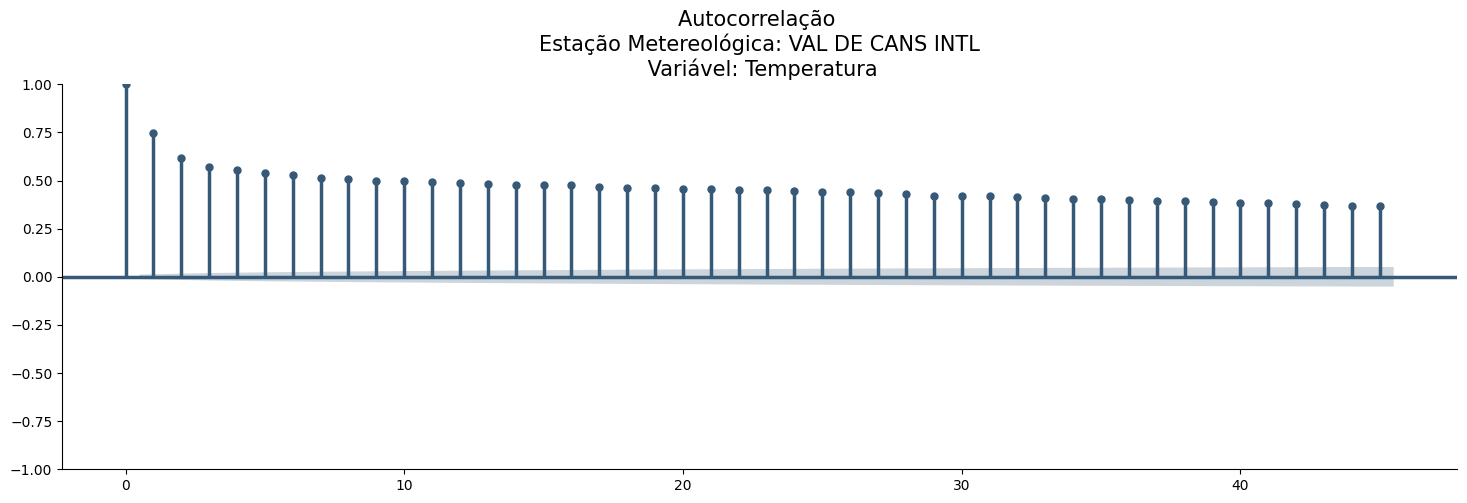

In [35]:
fig = plot_acf(df_unique_station["temp"])

# Plot
plt.title('Autocorrelação \nEstação Metereológica: {}\n Variável: {}'.format(df_unique_station["name"].unique()[0],
                                                                             name_variable_analysis),
          size=15)

# SALVANDO A FIGURA
plt.savefig(os.path.join("data/5_MODEL_GHCN_DAILY/1_ANALYSIS_WHITE_NOISE",
                         "estacao_metereologica_{}_autocorrelacao.png".format(df_unique_station["name"].unique()[0])))

plt.show()

## RANDOM WALK

### Teste de Dickey-Fuller Aumentado (ADF)

'Estatística ADF' é o valor numérico da estatística do teste ADF.

'Valor p' é o valor p associado ao teste estatístico. Se o valor p for menor que um certo limite (tipicamente 0.05), pode-se rejeitar a hipótese nula de que a série temporal possui raiz unitária, sugerindo que ela não se comporta como um random walk.

In [38]:
def test_adfuller_stationarity(data, critical_value=0.05):

  """

    VERIFICA SE UMA SÉRIE DE DADOS É ESTACIONÁRIA

    SE O VALOR P (P-VALUE) FOR MENOR QUE O NÍVEL DE SIGNIFICÂNCIA ESCOLHIDO
    (POR EXEMPLO, 0.05 OU 0.01), PODE-SE REJEITAR A HIPÓTESE NULA DE
    QUE A SÉRIE TEMPORAL POSSUI RAIZ UNITÁRIA (QUE INDICA PRESENÇA DE NÃO ESTACIONARIDADE).

    - Hipótese nula (H0): A série temporal possui raiz unitária, o que indica a presença de não estacionariedade.
    - Hipótese alternativa (H1): A série temporal não possui raiz unitária, ou seja, é estacionária

    # Arguments
      data                           - Required: Dados a serem analisados (DataFrame)
      critical_value                 - Optional: Valor critico a ser considerado (Integer)

    # Returns
      result_test_ljung_box          - Required: Resultado do teste Ljung-Box (DataFrame)
      data_is_white_noise            - Required: Resultado da verificação se a curva é white noise (Boolean)

  """

  # APLICANDO O TESTE DE ADFULLER
  result_test_adfuller = adfuller(data)

  print('ADF Statistic:', result_test_adfuller[0])
  print('p-value:', result_test_adfuller[1])

  if result_test_adfuller[1] < critical_value:
    data_is_stationarity = True
  else:
    data_is_stationarity = False

  return result_test_adfuller, data_is_stationarity

In [40]:
result_test_adfuller, data_is_stationarity = test_adfuller_stationarity(data=df_unique_station["temp"])

ADF Statistic: -11.790843804848139
p-value: 9.835164686545314e-22


In [41]:
print("A CURVA É ESTACIONÁRIA: {} E PORTANTO SEU TESTE DE RANDOM WALK É: {}".format(data_is_stationarity,
                                                                                    data_is_stationarity==False))

A CURVA É ESTACIONÁRIA: True E PORTANTO SEU TESTE DE RANDOM WALK É: False
